**Task_1**

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

Відобразимо датасет student_scores.csv, який даний нам для виконання домашнього завдання:

In [40]:
data = pd.read_csv('C:/Users/Vitalii/Downloads/Telegram Desktop/student_scores.csv')
data

,hours,scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [41]:
data.describe()

,hours,scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Побудуємо модель простої регресії для знаходження залежності між значеннями протяжності навчання і середнього балу студентів:

In [42]:
X = data['hours']
y = data['scores']
model = LinearRegression()

In [43]:
X1 = np.array(X).reshape(-1,1)

In [44]:
y1 = np.array(y)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.3, random_state = 2)

In [46]:
model.fit(X_train, y_train)

LinearRegression()

На даному етапі наша модель натренована. Тепер ми можемо її "запредиктити":

In [47]:
y_pred = model.predict(X_test)

Побудуємо графік, що відображає як навчилась наша модель:

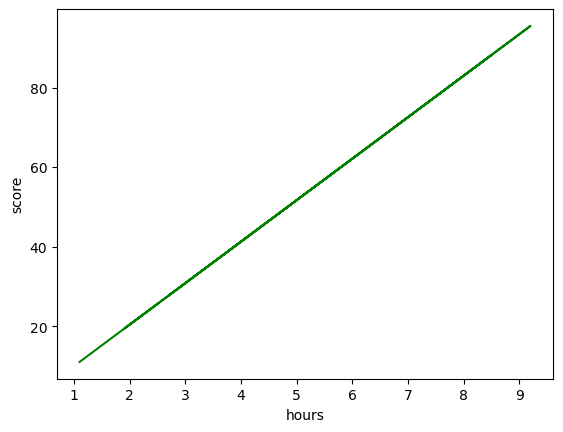

In [48]:
plt.plot(X_test, y_pred, color='green')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

Відобразимо параметри b і m, де m відповідає за нахил, а b - початковий зсув:

In [49]:
b, m = model.intercept_, model.coef_
m = m[0]

In [50]:
b, m

(-0.4416515935882117, 10.42786752323333)

In [51]:
model.score(X_train, y_train)

0.9496868783142939

In [52]:
model.score(X_test, y_test)

0.9420584734434517

Побудуємо графік, що відображає, як натренувалась наша модель відносно вихідних даних:

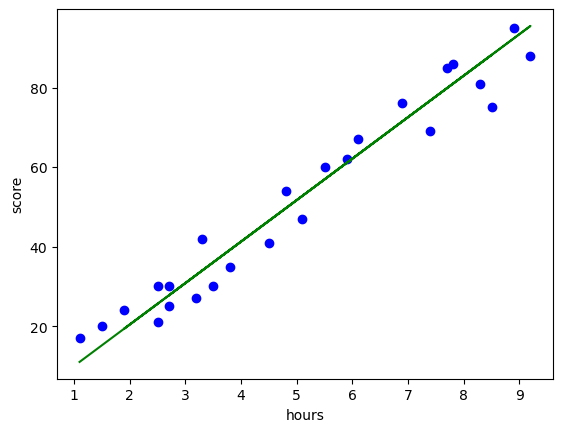

In [53]:
plt.scatter(data.hours, data.scores, color='blue')
plt.plot(X_test, y_pred, color='green')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

**Оцінка якості отриманої регресії:**

In [54]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [55]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 5.94
Mean squared error: 44.43
Root mean squared error: 6.67
